In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pylab as pl

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv("avocado.csv").drop(columns=["Unnamed: 0"])

In [3]:
data

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [4]:
print(f'Null –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:\n{data.isnull().sum()}\n')
print(f'NaN –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:\n {data.isna().sum()}\n')
print(f"–¢–∏–ø—ã  –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:\n {data.dtypes}\n")

Null –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

NaN –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:
 Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

–¢–∏–ø—ã  –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:
 Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object



–ü—Ä–æ–ø—É—Å–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç

In [5]:
data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [6]:
sns.set_context("talk", font_scale=0.7)

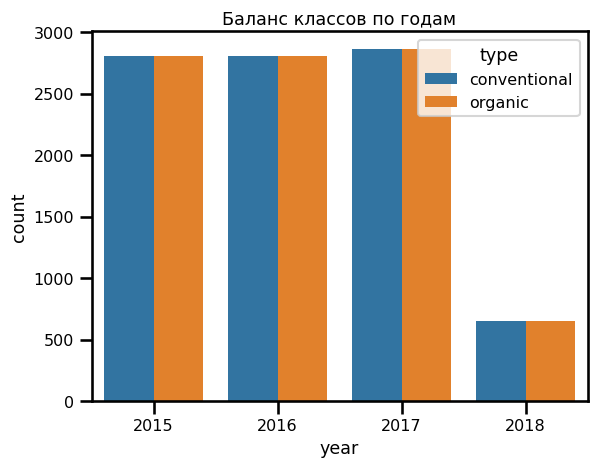

In [7]:
sns.countplot(x='year', hue='type', data=data)
plt.title('–ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ –ø–æ –≥–æ–¥–∞–º')
plt.show()

–ö–ª–∞—Å—Å—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ, –Ω–æ –≤ 2018 –≥–æ—Ä–∞–∑–¥–æ –º–µ–Ω—å—à–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π

<Axes: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

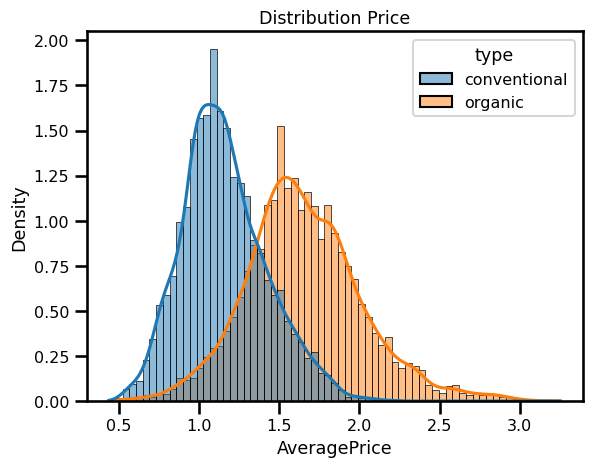

In [8]:
pl.title("Distribution Price")
sns.histplot(data=data, x="AveragePrice", hue="type", kde=True, stat="density", common_norm=False)

–í–∏–¥–∏–º —á—Ç–æ –æ—Ä–≥–∞–Ω–∏—á–µ—Å–∫–∏–µ –≤ —Å—Ä–µ–¥–Ω–µ–º –¥–æ—Ä–æ–∂–µ, –Ω–æ –æ–±–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ—Ö–æ–∂–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ 

–ü–æ—Å–º–æ—Ç—Ä–∏–º –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

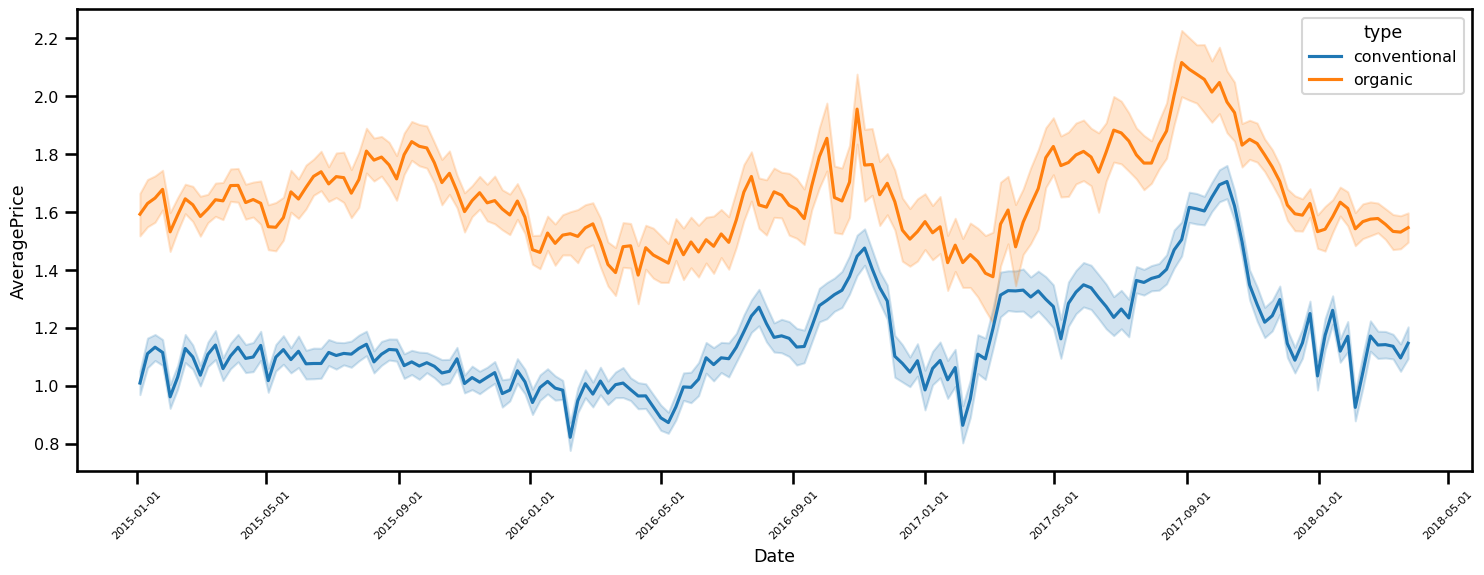

In [11]:
plt.figure(figsize=(18, 6))
ax = sns.lineplot(x='Date', y='AveragePrice', hue='type', data=data)
plt.xticks(rotation=45, fontsize=8)
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])

<Figure size 1000x1000 with 0 Axes>

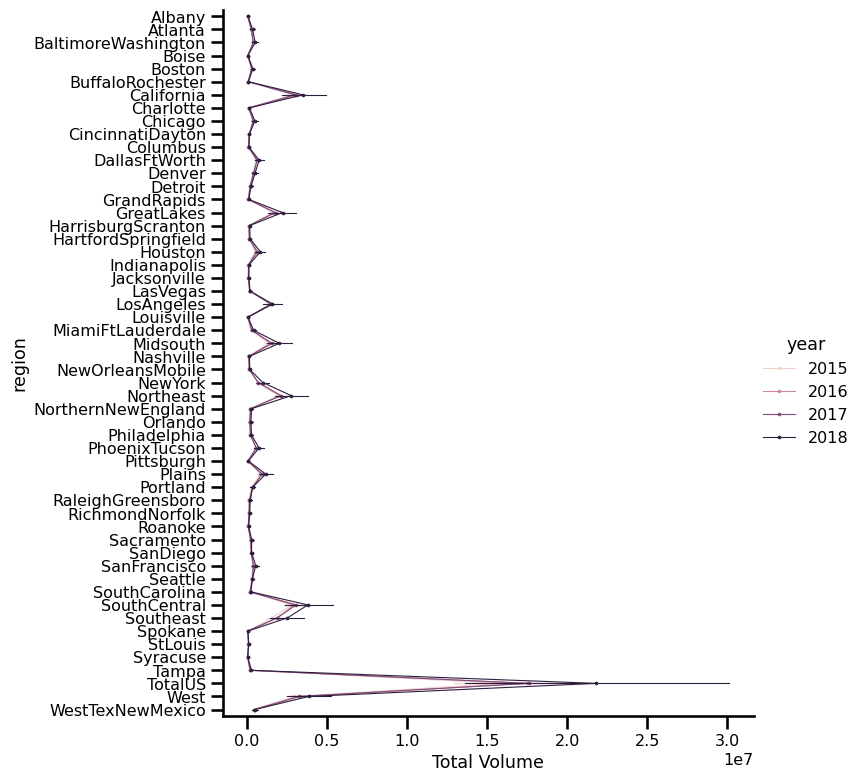

In [12]:
plt.figure(figsize=(10, 10))
sns.catplot(x='Total Volume', y='region', data=data, hue='year', height=8, kind='point', linewidth=0.8)

–†–∞–∑–ª–∏—á–∏–π –ø–æ –≥–æ–¥–∞–º –¥–ª—è —Ä–µ–≥–∏–æ–Ω–æ–≤ –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è

–í—ã—Ç–∞—â–∏–º –∏–∑ –¥–∞—Ç—ã –º–µ—Å—è—Ü –∏ –¥–µ–Ω—å

In [13]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [14]:
data

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[18249 rows x 15 columns]

In [15]:
continuous_columns = [key for key in data.keys() if data[key].dtype in ("int32", "int64", "float64")]
categorical_columns = [key for key in data.keys() if data[key].dtype == "object"]
print(f"–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: {categorical_columns}\n–ß–∏—Å–ª–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: {continuous_columns}")

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['type', 'region']
–ß–∏—Å–ª–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Ü–µ–Ω—ã —Å —á–∏—Å–ª–µ–Ω–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

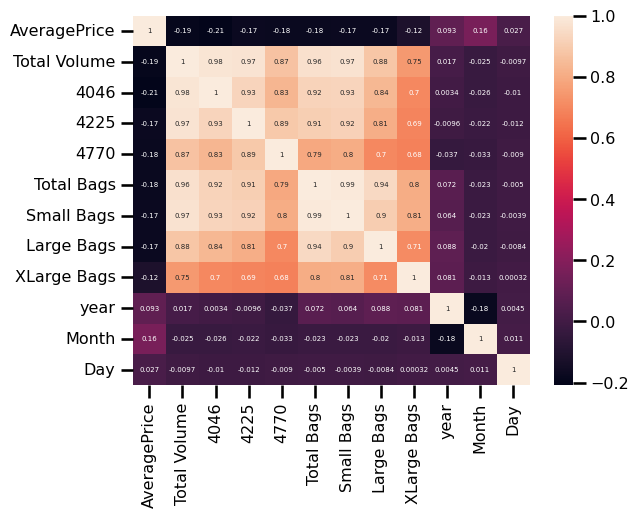

In [16]:
sns.heatmap(data[continuous_columns].corr(), annot=True, annot_kws = {'size':5})
plt.show()

–í–∏–¥–∏–º, —á—Ç–æ —Ü–µ–Ω–∞ –Ω–µ —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å —á–∏—Å–ª–µ–Ω–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏. –ù–æ –≤—ã–¥–µ–ª–∏–º Total Bags –∏ Total Volume –∏ Day.

–ò—Å–ø–æ–ª—å–∑—É–µ–º label encoding –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}
for column in categorical_columns:
    label.fit(data[column].drop_duplicates()) 
    dicts[column] = list(label.classes_)
    data[column] = label.transform(data[column]) 

In [18]:
dicts

{'type': ['conventional', 'organic'],
 'region': ['Albany',
  'Atlanta',
  'BaltimoreWashington',
  'Boise',
  'Boston',
  'BuffaloRochester',
  'California',
  'Charlotte',
  'Chicago',
  'CincinnatiDayton',
  'Columbus',
  'DallasFtWorth',
  'Denver',
  'Detroit',
  'GrandRapids',
  'GreatLakes',
  'HarrisburgScranton',
  'HartfordSpringfield',
  'Houston',
  'Indianapolis',
  'Jacksonville',
  'LasVegas',
  'LosAngeles',
  'Louisville',
  'MiamiFtLauderdale',
  'Midsouth',
  'Nashville',
  'NewOrleansMobile',
  'NewYork',
  'Northeast',
  'NorthernNewEngland',
  'Orlando',
  'Philadelphia',
  'PhoenixTucson',
  'Pittsburgh',
  'Plains',
  'Portland',
  'RaleighGreensboro',
  'RichmondNorfolk',
  'Roanoke',
  'Sacramento',
  'SanDiego',
  'SanFrancisco',
  'Seattle',
  'SouthCarolina',
  'SouthCentral',
  'Southeast',
  'Spokane',
  'StLouis',
  'Syracuse',
  'Tampa',
  'TotalUS',
  'West',
  'WestTexNewMexico']}

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Ü–µ–Ω—ã —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

In [19]:
data

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  \
0         8696.87     8603.62       93.25          0.0     0  2015       0   
1         9505.56     9408.07       97.49          0.0     0  2015       0   
2         8145.35     8042.21      103.14          0.0     0  2015       0   
3         5811.16     5677.40      133.76          0.0     0  2015       0   
4         6183.95     5986.26      197.69          0.0     0  2015       0   
...           ...         ...         ...          ...   ...   ...     ...   
18244    13498.67    13066.82      431.85          0.0     1  2018      53   
18245     9264.84     8940.04      324.80          0.0     1  2018      53   
18246     9394.11     9351.80       42.31          0.0     1  2018      53   
18247    10969.54    10919.54       50.00          0.0     1  2018      53   
18248    12014.15    11988.14       26.01          0.0     1  2018      53   

       Month  Day  
0         12   27  
1         12   20  
2         12   13  
3         12    6  
4         11   29  
...      ...  ...  
18244      2    4  
18245      1   28  
18246      1   21  
18247      1   14  
18248      1    7  

[18249 rows x 15 columns]

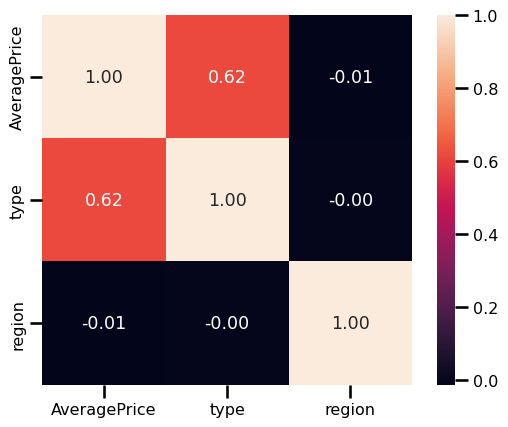

In [20]:
columns = ['AveragePrice'] + categorical_columns
cm = np.corrcoef(data[columns].values.T)
hm = sns.heatmap(cm,cbar = True, annot = True, square = True, fmt = '.2f', yticklabels = columns, xticklabels = columns)

–û–∂–∏–¥–∞–µ–º–æ —Å —Ç–∏–ø–æ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–∞–∏–±–æ–ª—å—à–∞—è. –†–µ–≥–∏–æ–Ω –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –≤–ª–∏—è–µ—Ç

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∑–∞–≤–µ—Ä—à–µ–Ω–∞

–ü—Ä–∏–º–µ–Ω–∏–º –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é

In [21]:
import statsmodels.api as sm

X = data[['Total Volume', 'Total Bags', 'Day', 'type']]
y = data['AveragePrice']

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã (intercept) –∫ –ø—Ä–∏–∑–Ω–∞–∫–∞–º
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     2830.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        08:38:38   Log-Likelihood:                -4889.4
No. Observations:               18249   AIC:                             9789.
Df Residuals:                   18244   BIC:                             9828.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1490      0.005    210.241   

–ü–æ P-value –≤–∏–¥–Ω–æ, —á—Ç–æ –≤—Å–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã, —Ç.–∫. –≤—Å–µ < 0.05

In [23]:
target_column = "AveragePrice"
X = data[data.columns.drop([target_column, 'Date'])]

In [24]:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler

seed = 42
target_column = "AveragePrice"
np.random.seed(seed)

# scaler = StandardScaler()
# data_scaled = data.copy()
# data_scaled[continuous_columns] = scaler.fit_transform(data[continuous_columns])

test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    np.array(data[target_column]),
    test_size=test_size,
    random_state=seed)

print(f"Train : {X_train.shape} {Y_train.shape}")
print(f"Test : {X_test.shape} {Y_test.shape}")

Train : (14599, 13) (14599,)
Test : (3650, 13) (3650,)


In [25]:
Y_train

array([1.88, 0.81, 2.01, ..., 1.31, 1.13, 1.35], shape=(14599,))

–ü—Ä–æ–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º —Ü–µ–Ω—É, —á—Ç–æ–±—ã –≤—ã—Ä–∞–∑–∏—Ç—å –æ—à–∏–±–∫—É –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö 

In [26]:
Y_train_log = np.log(Y_train)
clf = LinearRegression()
scores = abs(cross_val_score(clf, X_train, Y_train_log, cv=10, scoring='neg_mean_absolute_error'))
print(f"r2: {cross_val_score(clf, X_train, Y_train_log, cv=10).mean()}")
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {scores.mean()}")
#Test
clf.fit(X_train, Y_train_log)
Y_test_log = np.log(Y_test)
Y_pred = clf.predict(X_test)
mae = mean_absolute_error(Y_test_log, Y_pred)
r2 = r2_score(Y_test_log, Y_pred)
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: {mae}")
print(f"R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: {r2}")

r2: 0.4517245740558762
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.16731673362534635
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.16807136186830487
R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.4447005043598189


–ù–∞–∏–±–æ–ª–µ–µ –≤–ª–∏—è—Ç–µ–ª—å—ã–Ω–π –ø—Ä–∏–∑–Ω–∞–∫ - —Ç–∏–ø. –û—à–∏–±–∫–∞ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ø—Ä–∏–º–µ—Ä–Ω–æ 16%

–ü–æ–ø—Ä–æ–±—É–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥

In [27]:
gb_model = GradientBoostingRegressor()
boost_scores = abs(cross_val_score(gb_model, X_train, Y_train, cv=3, scoring='neg_mean_absolute_error'))
print(f"r2: {cross_val_score(gb_model, X_train, Y_train_log, cv=3).mean()}")
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {boost_scores.mean()}")
#Test
gb_model.fit(X_train, Y_train_log)
Y_test_log = np.log(Y_test)
Y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(Y_test_log, Y_pred)
r2 = r2_score(Y_test_log, Y_pred)
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: {mae}")
print(f"R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: {r2}")


r2: 0.762568337923423
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.15159482924159454
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.10922901070034423
R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.7583097230282252


–ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ–¥–æ–±—Ä–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã

In [ ]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

def cv(X, y, model, n_splits):
    kf = KFold(n_splits)

    rmse_arr = []
    r2_arr = []

    for train, test in tqdm(kf.split(X, y), total=n_splits):
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train, y_train)
        rmse = np.array([-root_mean_squared_error(y_test, p) for p in clf.staged_predict(X_test)])
        r2 = np.array([r2_score(y_test, p) for p in clf.staged_predict(X_test)])
        rmse_arr.append(rmse)
        r2_arr.append(r2)

    return np.array(rmse_arr), np.array(r2_arr)


def rf_cv(X, y, n_trees, depth):
    result = {}
    cv_scores = []
    oob_scores = []

    for d in tqdm(depth):
        clf = RandomForestRegressor(n_estimators=n_trees, max_depth=d, random_state=0, n_jobs=-1, oob_score=True)
        cv_score = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
        clf.fit(X, y)
        cv_scores.append(cv_score.mean())
        oob_scores.append(clf.oob_score_)
    
    result[f'n={n_trees}_cv'] = cv_scores 
    result[f'n={n_trees}_oob'] = oob_scores 

    return result

d:\code\mlhw\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
depth = [d for d in range(1, 20, 5)]
rf_cv1 = rf_cv(X, y, 100, depth)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [01:15<00:00, 18.98s/it]


In [ ]:
rf_cv2 = rf_cv(X, y, 200, depth)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [02:13<00:00, 33.43s/it]


In [ ]:
rf_cv3 = rf_cv(X, y, 300, depth)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [03:32<00:00, 53.21s/it]


In [41]:
rf_cv1

{'n=100_cv': [np.float64(0.3830906991686958),
  np.float64(0.6851842797907876),
  np.float64(0.8417696165844708),
  np.float64(0.8681595968515438)],
 'n=100_oob': [0.38333542195223536,
  0.6825689098734109,
  0.8543966205949919,
  0.8858753149753982]}

In [45]:
rf_cv2

{'n=200_cv': [np.float64(0.3830960852366367),
  np.float64(0.6850480597252074),
  np.float64(0.8424974191620915),
  np.float64(0.8690563550209509)],
 'n=200_oob': [0.38333147737088125,
  0.6837855929560394,
  0.856843693470055,
  0.8887108047237146]}

In [46]:
rf_cv3

{'n=300_cv': [np.float64(0.38308554378776444),
  np.float64(0.6852275877618584),
  np.float64(0.842507213321106),
  np.float64(0.8690257321927124)],
 'n=300_oob': [0.3833238914480184,
  0.6841399312827632,
  0.8571105137072179,
  0.8891482476489441]}

Text(0.5, 0, '–ì–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤—å–µ–≤')

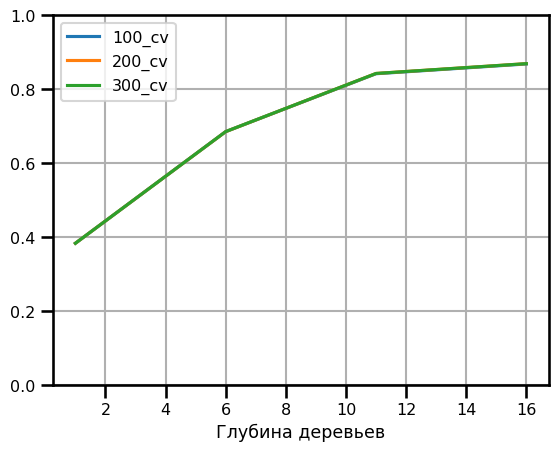

In [44]:
plt.plot(depth, rf_cv1['n=100_cv'], label='100_cv')
plt.plot(depth, rf_cv2['n=200_cv'], label='200_cv')
plt.plot(depth, rf_cv3['n=300_cv'], label='300_cv')
plt.legend()
plt.grid()
plt.ylim(0, 1)
plt.xlabel('–ì–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤—å–µ–≤')

Text(0.5, 0, '–ì–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤—å–µ–≤')

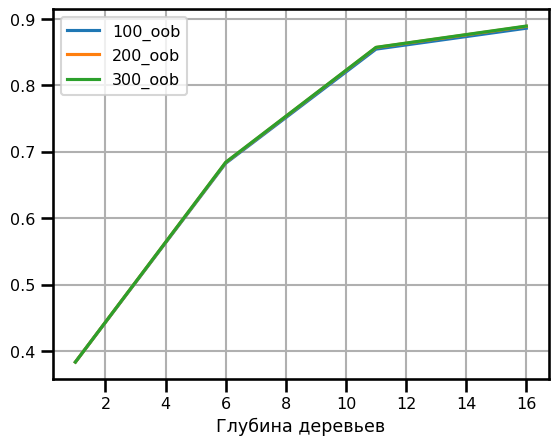

In [47]:
plt.plot(depth, rf_cv1['n=100_oob'], label='100_oob')
plt.plot(depth, rf_cv2['n=200_oob'], label='200_oob')
plt.plot(depth, rf_cv3['n=300_oob'], label='300_oob')
plt.legend()
plt.grid()
plt.xlabel('–ì–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤—å–µ–≤')

In [37]:

gb_1 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=11)
gb_2 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=11)
gb_3 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=8, random_state=11)

gb_4 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=11)
gb_5 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=8, random_state=11)

cv_gb1_rmse, cv_gb1_r2 = cv(X, y, gb_1, 3)
cv_gb2_rmse, cv_gb2_r2 = cv(X, y, gb_2, 3)
cv_gb3_rmse, cv_gb3_r2 = cv(X, y, gb_3, 3)
cv_gb4_rmse, cv_gb4_r2 = cv(X, y, gb_4, 3)
cv_gb5_rmse, cv_gb5_r2 = cv(X, y, gb_5, 3)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [11:34<00:00, 231.66s/it]


max - -0.23337850845126126 argmax - 991
max - -0.24947215731627215 argmax - 999
max - -0.2880809570295354 argmax - 957
max - -0.2720814961862865 argmax - 999
max - -0.28846194118767715 argmax - 980


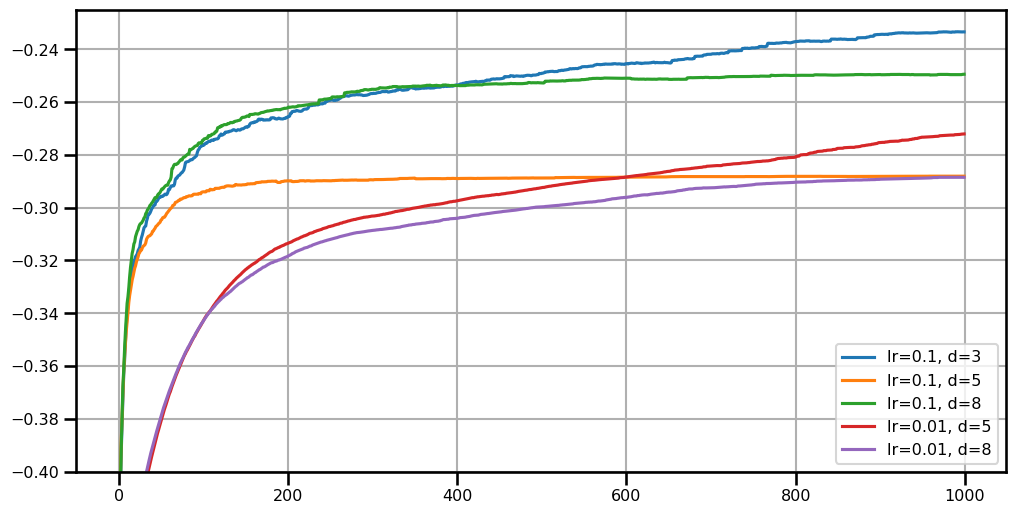

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(cv_gb1_rmse.mean(axis=0), label='lr=0.1, d=3')
plt.plot(cv_gb3_rmse.mean(axis=0), label='lr=0.1, d=5')
plt.plot(cv_gb2_rmse.mean(axis=0), label='lr=0.1, d=8')
plt.plot(cv_gb4_rmse.mean(axis=0), label='lr=0.01, d=5')
plt.plot(cv_gb5_rmse.mean(axis=0), label='lr=0.01, d=8')
plt.ylim((-0.4, -0.225))
plt.grid()
plt.legend()

print(f"max - {np.max(cv_gb1_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb1_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb2_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb2_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb3_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb3_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb4_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb4_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb5_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb5_rmse.mean(axis=0))}")

r2: 0.762568337923423  
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.15159482924159454  
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.10922901070034423  
R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.7583097230282252  

In [29]:
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=8)
boost_scores = abs(cross_val_score(gb_model, X_train, Y_train, cv=3, scoring='neg_mean_absolute_error'))
print(f"r2: {cross_val_score(gb_model, X_train, Y_train_log, cv=3).mean()}")
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {boost_scores.mean()}")
#Test
gb_model.fit(X_train, Y_train_log)
Y_test_log = np.log(Y_test)
Y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(Y_test_log, Y_pred)
r2 = r2_score(Y_test_log, Y_pred)
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: {mae}")
print(f"R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: {r2}")

r2: 0.9120506751745233
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.08835506353506668
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.05692395041671398
R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.9268347035670982


–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'max_depth': 6, 'learning_rate': 0.11690237714302139}  
–õ—É—á—à–µ–µ MAE: 0.0740

In [73]:
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.11690237714302139, max_depth=6)

#Test
gb_model.fit(X_train, Y_train_log)
Y_test_log = np.log(Y_test)
Y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(Y_test_log, Y_pred)
r2 = r2_score(Y_test_log, Y_pred)
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: {mae}")
print(f"R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: {r2}")

–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.05621768750894984
R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.9316602590634446


In [48]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=12, n_jobs=-1)
boost_scores = abs(cross_val_score(rf_model, X_train, Y_train, cv=3, scoring='neg_mean_absolute_error'))
print(f"r2: {cross_val_score(rf_model, X_train, Y_train_log, cv=3).mean()}")
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {boost_scores.mean()}")
#Test
rf_model.fit(X_train, Y_train_log)
Y_test_log = np.log(Y_test)
Y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(Y_test_log, Y_pred)
r2 = r2_score(Y_test_log, Y_pred)
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: {mae}")
print(f"R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: {r2}")

r2: 0.8630124229553434
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.11071053072361658
–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.07466973775031333
R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ: 0.8792571722647644


–û—à–∏–±–∫–∞ —á—É—Ç—å –Ω–∏–∂–µ, —á–µ–º —É –ª–∏–Ω. —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.

–≤–∏–¥–∏–º, —á—Ç–æ –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –≤–µ–¥–µ—Ç —Å–µ–±—è –ª–∏–Ω–µ–π–Ω–æ,–∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ —Å–ø–æ—Å–æ–±–µ–Ω –ø–æ–¥—Å—Ç—Ä–∞–∏–≤–∞—Ç—å—Å—è –∏ —Å—Ç—Ä–æ–∏—Ç—å –∫—É—Å–æ—á–Ω–æ –ø–æ—Å—Ç–æ—è–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è —Å—Ç—Ä–µ–º—Ç—å—Å—è –∑–∞–Ω—è—Ç—å –ø–æ–ª–æ–∂–µ–Ω–∏–µ –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –æ–±–ª–∞—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö.

In [ ]:
def bPlot(Column):
    # –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    new_data = pd.DataFrame()
    new_data[Column] = X_train[Column]
    new_data[target_column] = Y_train_log

    # –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –ª–∏–Ω–∏–π
    res = new_data.sort_index().sort_values(Column, kind='mergesort')

    # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª–∏
    TotalVolume = res[Column].values[:, np.newaxis]
    y_ = np.array(res[target_column])
    clf.fit(TotalVolume, y_)
    gb_model.fit(TotalVolume, y_)

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    res['Linear Prediction'] = clf.predict(TotalVolume)
    res['GB Prediction'] = gb_model.predict(TotalVolume)
    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=res, x=Column, y=target_column, color='green', edgecolor='none', label='–î–∞–Ω–Ω—ã–µ')
    sns.lineplot(data=res, x=Column, y='Linear Prediction', color='red', label='–õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å')
    sns.lineplot(data=res, x=Column, y='GB Prediction', color='blue', label='GB –º–æ–¥–µ–ª—å')

    plt.title(f"–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ —Ü–µ–Ω—ã –æ—Ç {Column}")
    plt.xlabel(Column)
    plt.ylabel("–õ–æ–≥–∞—Ä–∏—Ñ–º —Ü–µ–Ω—ã")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [31]:
sns.set_palette("Set2")
sns.set_style("whitegrid")

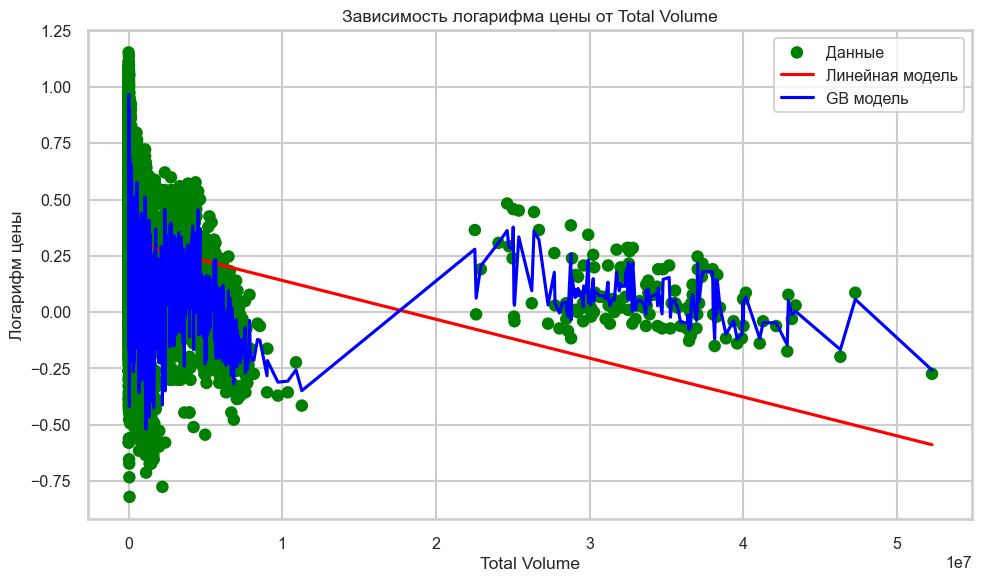

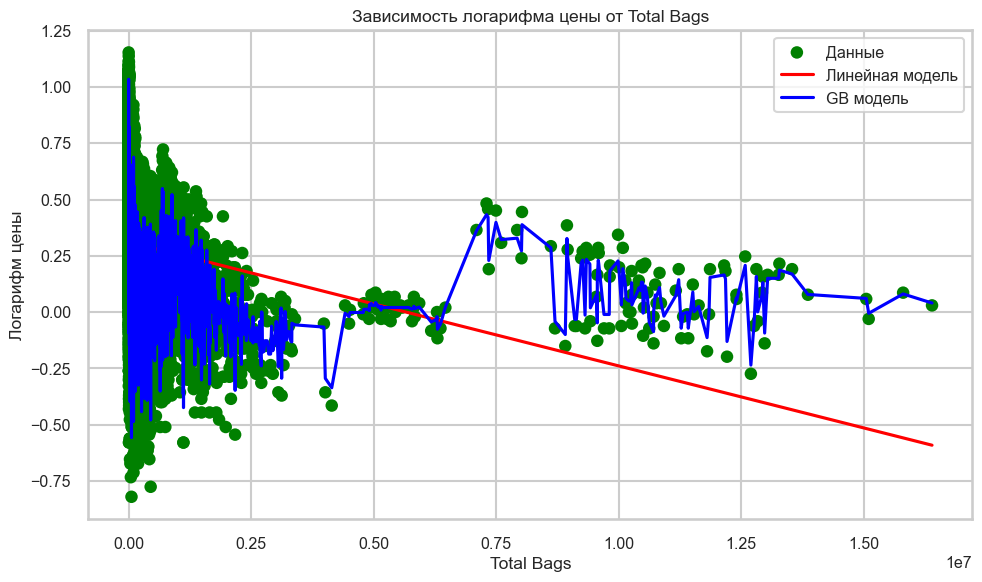

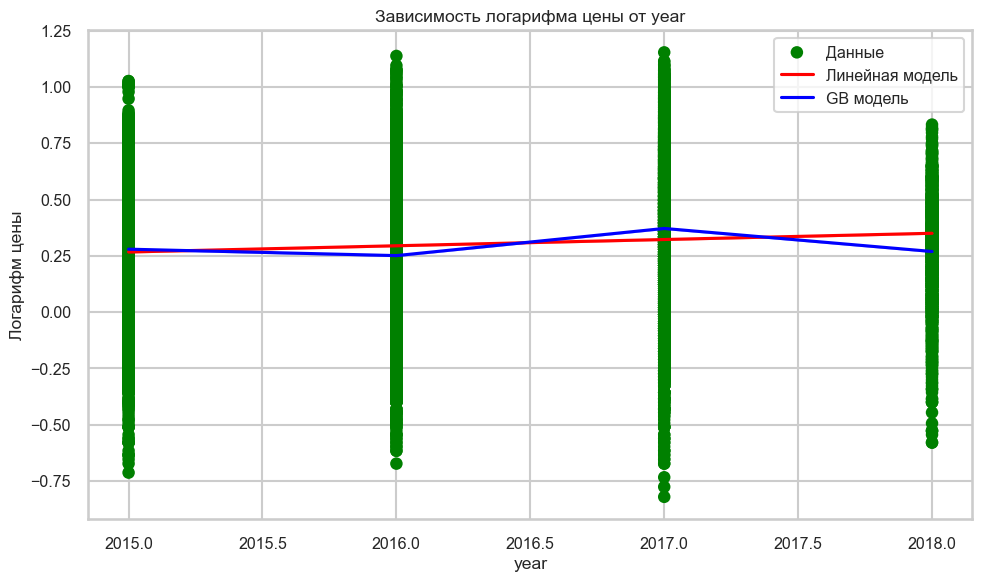

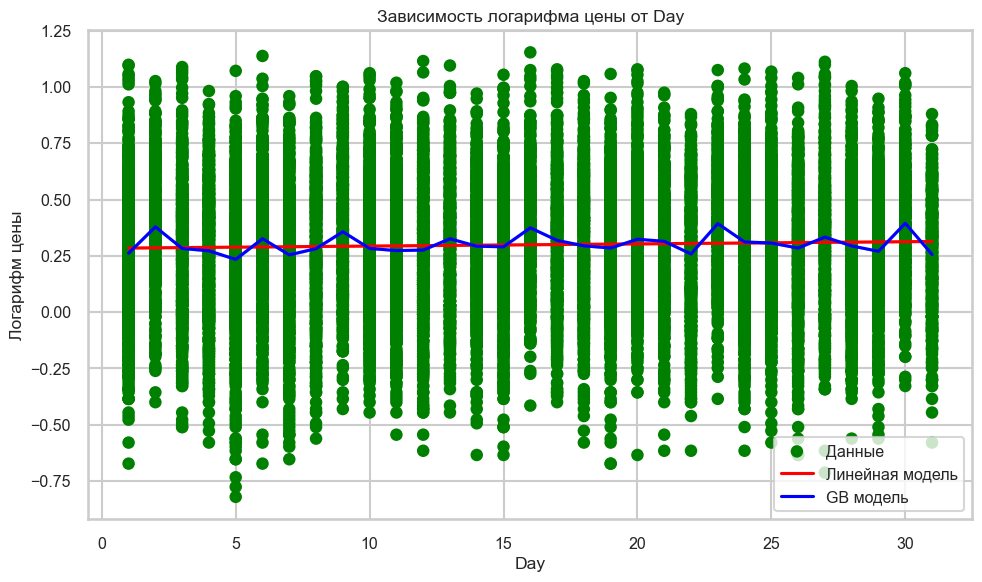

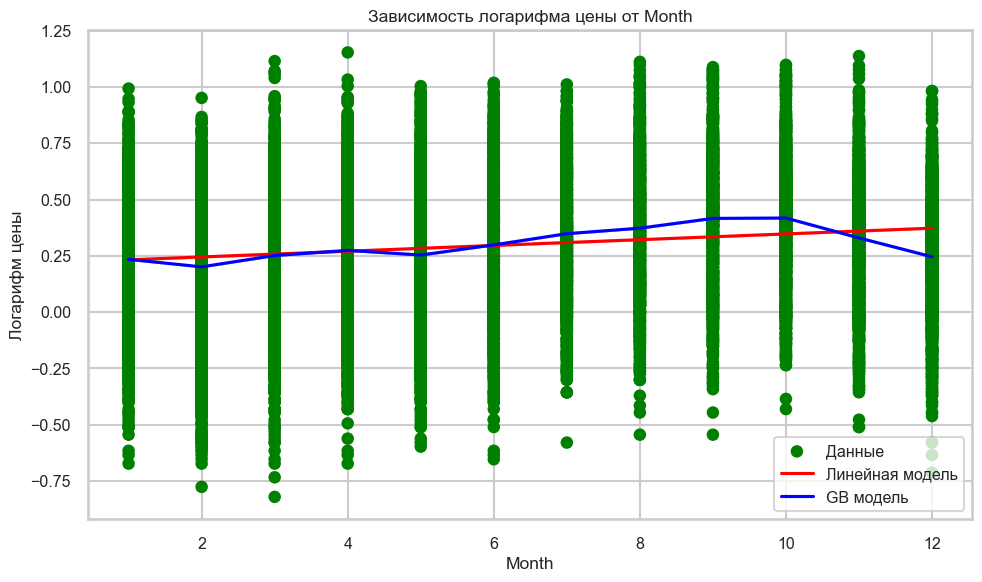

In [74]:
for col in ['Total Volume', 'Total Bags', 'year', 'Day', 'Month']:
    bPlot(col) 

–ó–¥–µ—Å—å –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å—Ç—Ä–∞–Ω–Ω–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –í–∏–¥–∏–º–æ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å—ã–º —Ç—Ä–µ–Ω–¥–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. 

–ù–æ –≤ —Ç–æ –∂–µ –≤—Ä–µ–º—è –≤–∏–¥–Ω–æ, —á—Ç–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –≥–æ—Ä–∞–∑–¥–æ –ª—É—á—à–µ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –∏ —Å–ø–æ—Å–æ–±–µ–Ω –ø–æ–¥—Å—Ç—Ä–∞–∏–≤–∞—Ç—å—Å—è –ø–æ–¥ –¥–∞–Ω–Ω—ã–µ –∫–æ—Ç–æ—Ä—ã–µ –æ–±–ª–∞–¥–∞—é—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–º–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—è–º–∏ –≤—ã—Å–æ–∫–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞.

–í —Ü–µ–ª–æ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –≥–æ—Ä–∞–∑–¥–æ —É—Å—Ç–æ–π—á–∏–≤–µ–µ –∏ –ª—É—á—à–µ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏. –ù–æ –ø–æ—Å–∫–æ–ª—å–∫—É –≤ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞–∏–±–æ–ª—å—à–µ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π –æ–±–ª–∞–¥–∞–ª –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ type, –∫–æ—Ç–æ—Ä—ã–π –º–æ–≥ –ø—Ä–∏–Ω–∏–º–∞—Ç—å 2 –∑–Ω–∞—á–µ–Ω–∏—è, –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –Ω–µ –¥–∞–≤–∞–ª –≤–µ—Å–æ–º–æ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π.

–ü–µ—Ä–µ–π–¥–µ–º –∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—é –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤

In [100]:
data.sort_values(by='Date')

Date  AveragePrice  Total Volume        4046       4225  \
11569 2015-01-04          1.75      27365.89     9307.34    3844.81   
9593  2015-01-04          1.49      17723.17     1189.35   15628.27   
10009 2015-01-04          1.68       2896.72      161.68     206.96   
1819  2015-01-04          1.52      54956.80     3013.04   35456.88   
9333  2015-01-04          1.64       1505.12        1.27    1129.50   
...          ...           ...           ...         ...        ...   
8574  2018-03-25          1.36     908202.13   142681.06  463136.28   
9018  2018-03-25          0.70    9010588.32  3999735.71  966589.50   
18141 2018-03-25          1.42     163496.70    29253.30    5080.04   
17673 2018-03-25          1.70     190257.38    29644.09   70982.10   
8814  2018-03-25          1.34    1774776.77    63905.98  908653.71   

            4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
11569     615.28    13598.46    13061.10      537.36         0.00     1  2015   
9593        0.00      905.55      905.55        0.00         0.00     1  2015   
10009       0.00     2528.08     2528.08        0.00         0.00     1  2015   
1819     1561.70    14925.18    11264.80     3660.38         0.00     0  2015   
9333        0.00      374.35      186.67      187.68         0.00     1  2015   
...          ...         ...         ...         ...          ...   ...   ...   
8574   174975.75   127409.04   103579.41    22467.04      1362.59     0  2018   
9018    30130.82  4014132.29  3398569.92   546409.74     69152.63     0  2018   
18141       0.00   129163.36   109052.26    20111.10         0.00     1  2018   
17673       0.00    89631.19    89424.11      207.08         0.00     1  2018   
8814      843.45   801373.63   774634.09    23833.93      2905.61     0  2018   

       region  Month  Day  
11569      46      1    4  
9593        8      1    4  
10009      16      1    4  
1819       34      1    4  
9333        3      1    4  
...       ...    ...  ...  
8574        8      3   25  
9018       45      3   25  
18141      45      3   25  
17673       6      3   25  
8814       28      3   25  

[18249 rows x 15 columns]

In [51]:
df = data.copy(deep = True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)
df = df.resample('W').sum()
df.head()

AveragePrice  Total Volume         4046         4225        4770  \
Date                                                                           
2015-01-04        140.54  8.467434e+07  33098258.74  36851038.43  2278818.64   
2015-01-11        148.03  7.855581e+07  31024164.99  32808429.84  2349167.45   
2015-01-18        150.24  7.838878e+07  31802706.86  31662041.93  2208250.55   
2015-01-25        150.89  7.646628e+07  32305132.87  28929122.37  2078378.86   
2015-02-01        134.68  1.194532e+08  50292988.96  50696230.48  3687489.31   

             Total Bags   Small Bags  Large Bags  XLarge Bags  type    year  \
Date                                                                          
2015-01-04  12446221.39   9910008.90  2485655.90     50556.59    54  217620   
2015-01-11  12374044.96  10352936.42  1977832.00     43276.54    54  217620   
2015-01-18  12715784.74  10548854.11  2145586.13     21344.50    54  217620   
2015-01-25  13153646.97  10877316.95  2252815.92     23514.10    54  217620   
2015-02-01  14776526.50  11576833.65  3073989.39    125703.46    54  217620   

            region  Month   Day  
Date                             
2015-01-04    2862    108   432  
2015-01-11    2862    108  1188  
2015-01-18    2862    108  1944  
2015-01-25    2862    108  2700  
2015-02-01    2862    216   108

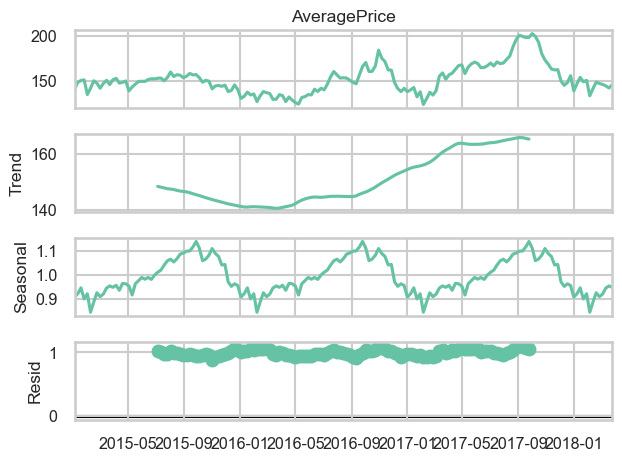

In [117]:
dec = sm.tsa.seasonal_decompose(df1['AveragePrice'], model = 'multiplicative').plot() #–º—É–ª—å—Ç–ø–∏–ª–∏–∫–∞—Ç–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –ø–µ—Ä–µ–º–Ω–æ–∂–∞—é—Ç—Å—è T*S*R
plt.show()

—Ç–µ—Å—Ç –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H0): –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (—Å–æ–¥–µ—Ä–∂–∏—Ç –µ–¥–∏–Ω–∏—á–Ω—ã–π –∫–æ—Ä–µ–Ω—å, —Ç–æ –µ—Å—Ç—å —Ç—Ä–µ–Ω–¥ –∏–ª–∏ –∏–∑–º–µ–Ω—è—é—â—É—é—Å—è —Å—Ç—Ä—É–∫—Ç—É—Ä—É).

–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H1): –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def DF_test(timeseries):
    # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # –†–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫ —Å —Ä–∞–∑–Ω—ã–º–∏ —Å—Ç–∏–ª—è–º–∏ –ª–∏–Ω–∏–π
    plt.figure(figsize=(15,5))
    plt.plot(timeseries, color='blue', label='Original', alpha=0.6)
    plt.plot(rolling_mean, color='red', linestyle='--', linewidth=2, label='Rolling Mean')
    plt.plot(rolling_std, color='black', linestyle='-.', linewidth=2, label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # –¢–µ—Å—Ç –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)


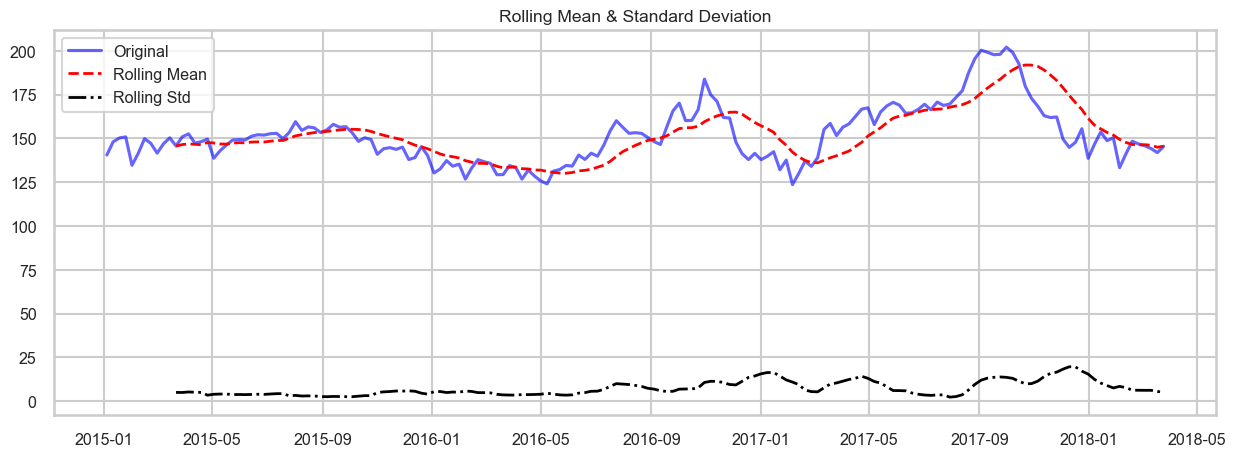

Results of Dickey-Fuller Test:
Test Statistic                  -2.363645
p-value                          0.152261
#Lags Used                       0.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


In [ ]:
DF_test(df['AveragePrice'])

–°—É–¥—è –ø–æ p-val —Ä—è–¥ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.

–ò–∑–±–∞–≤–∏–º—Å—è –æ—Ç –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏ –∏ —Ç—Ä–µ–Ω–¥–∞ —Å –ø–æ–º–æ—â—å—é –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è 

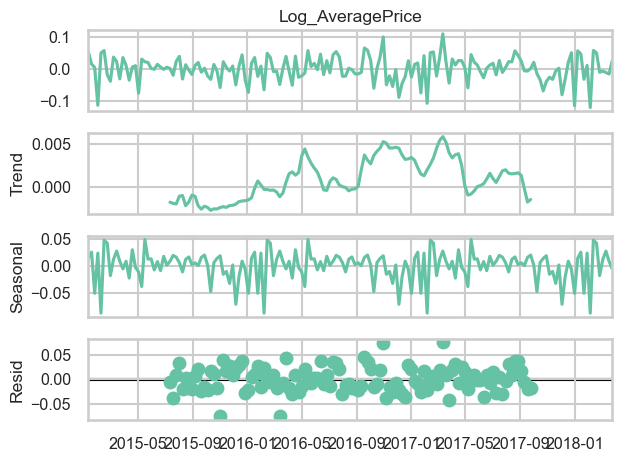

In [36]:
df['Log_AveragePrice'] = np.log(df['AveragePrice'])
df_log_diff = df['Log_AveragePrice'].diff()
df_log_diff = df_log_diff.dropna()

dec = sm.tsa.seasonal_decompose(df_log_diff,period = 52).plot()
plt.show()

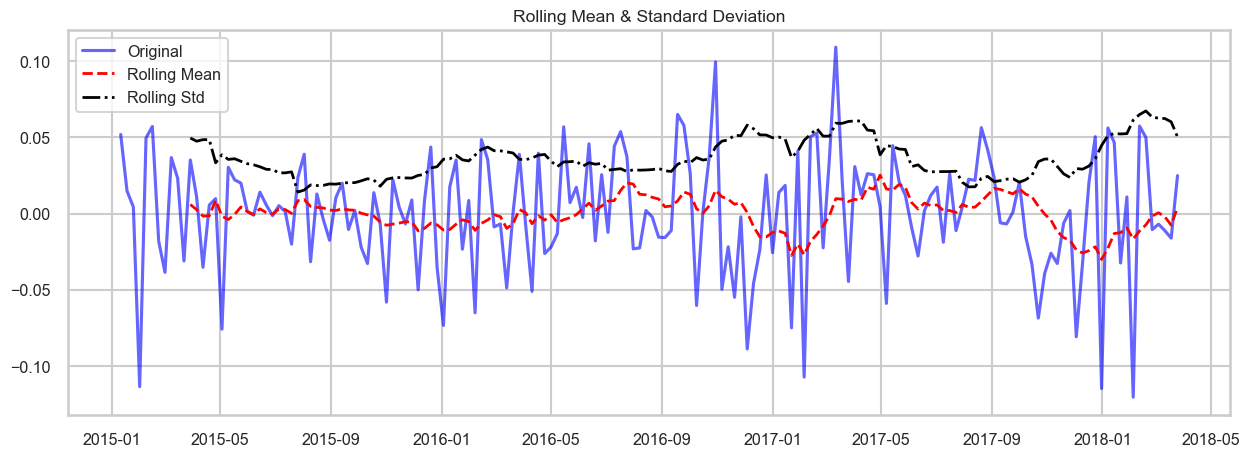

Results of Dickey-Fuller Test:
Test Statistic                -1.381774e+01
p-value                        8.010524e-26
#Lags Used                     0.000000e+00
Number of Observations Used    1.670000e+02
Critical Value (1%)           -3.470126e+00
Critical Value (5%)           -2.879008e+00
Critical Value (10%)          -2.576083e+00
dtype: float64


In [ ]:
DF_test(df_log_diff)

p-val < 0.05 -> —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω

ARIMA

AR (AutoRegressive) ‚Äî –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏—è:

–ú–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç —Ç–µ–∫—É—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä—è–¥–∞ —á–µ—Ä–µ–∑ –µ–≥–æ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (–ª–∞–≥–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è).
–ü–∞—Ä–∞–º–µ—Ç—Ä 
ùëù ‚Äî —á–∏—Å–ª–æ –ª–∞–≥–æ–≤ –≤ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏.

I (Integrated) ‚Äî –∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ:

–î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å —Ä—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º, –ø—Ä–∏–º–µ–Ω—è—é—Ç –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ.
–ü–∞—Ä–∞–º–µ—Ç—Ä 
ùëë ‚Äî –ø–æ—Ä—è–¥–æ–∫ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è.

MA (Moving Average) ‚Äî —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ:

–û—à–∏–±–∫–∞ —Ç–µ–∫—É—â–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –æ—à–∏–±–æ–∫ –º–æ–¥–µ–ª–∏.
–ü–∞—Ä–∞–º–µ—Ç—Ä 
ùëû ‚Äî –ø–æ—Ä—è–¥–æ–∫ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ.

In [166]:
model = ARIMA(df_log_diff, order=(1,1,2)) #p,d,q
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Log_AveragePrice   No. Observations:                  168
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 302.229
Date:                Sat, 17 May 2025   AIC                           -596.458
Time:                        17:05:42   BIC                           -583.986
Sample:                    01-11-2015   HQIC                          -591.396
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000     44.174     -0.023      0.982     -87.580      85.580
ma.L1      -1.232e-05     55.228  -2.23e-07      1.000    -108.244     108.244
ma.L2         -1.0000     55.228     -0.018      0.9

c:\Users\user\.conda\envs\nlp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [187]:
len(train)

119

	ARIMA MODEL: Walk-Forward Validation



c:\Users\user\.conda\envs\nlp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\.conda\envs\nlp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\.conda\envs\nlp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


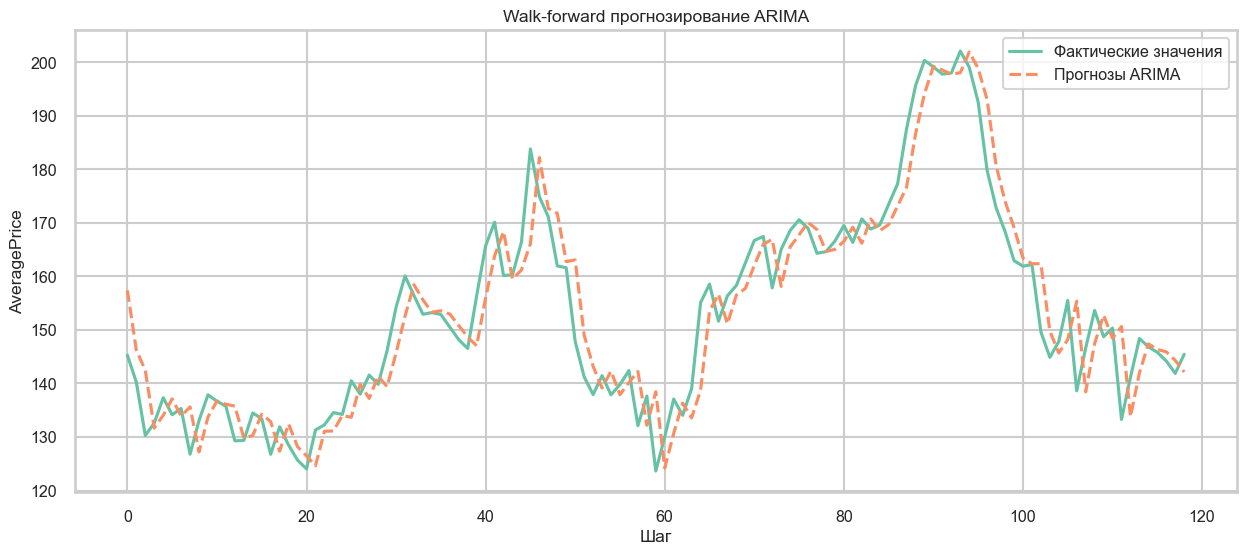

In [185]:
s = 50
train, test = df['Log_AveragePrice'][:-50], df['Log_AveragePrice'][50:]

print('\tARIMA MODEL: Walk-Forward Validation\n')

history = list(train)
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    
    # –û–¥–Ω–æ—à–∞–≥–æ–≤—ã–π –ø—Ä–æ–≥–Ω–æ–∑
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # –î–æ–±–∞–≤–ª—è–µ–º —Ä–µ–∞–ª—å–Ω–æ–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ –≤ –∏—Å—Ç–æ—Ä–∏—é
    obs = test.iloc[t]
    history.append(obs)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø—Ä–æ–≥–Ω–æ–∑—ã –∏–∑ –ª–æ–≥–∞—Ä–∏—Ñ–º–æ–≤ –≤ –∏—Å—Ö–æ–¥–Ω—ã–π –º–∞—Å—à—Ç–∞–±
predictions_exp = np.exp(predictions)
test_exp = np.exp(test)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(15,6))
plt.plot(test_exp.values, label='–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.plot(predictions_exp, label='–ü—Ä–æ–≥–Ω–æ–∑—ã ARIMA', linestyle='--')
plt.title('Walk-forward –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ ARIMA')
plt.xlabel('–®–∞–≥')
plt.ylabel('AveragePrice')
plt.legend()
plt.show()

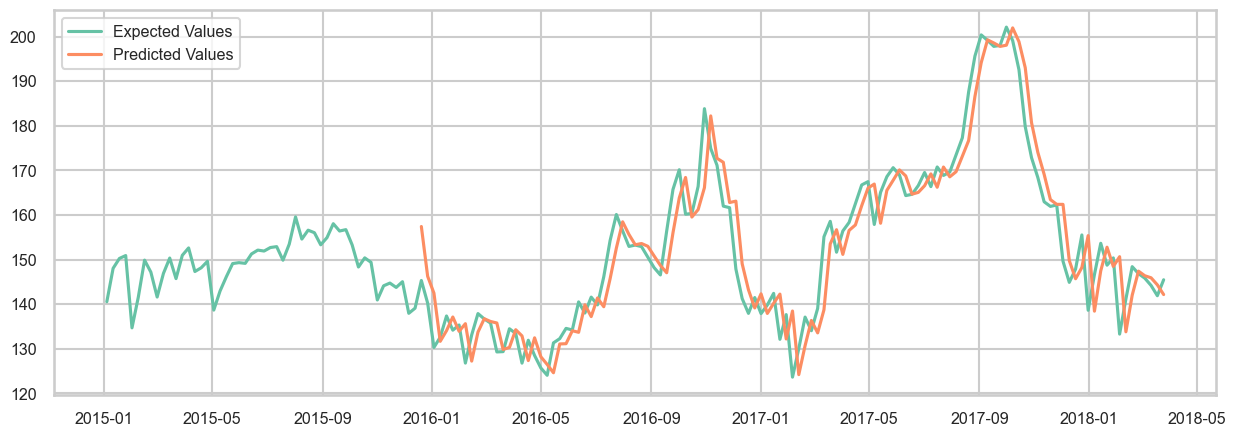

In [188]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df['AveragePrice'],label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [189]:
error = np.sqrt(mean_absolute_error(np.exp(test),np.exp(predictions)))
print('Test MAE: %.4f' % error)
predictions_series = pd.Series(np.exp(predictions), index = test.index)

Test MAE: 2.2298


–ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –±—É–¥—É—â–µ–µ

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# --- –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ ---
def create_features(df, target_col='AveragePrice', lags=[1,7,14], windows=[7,14]):
    df_feat = df.copy()
    
    for lag in lags:
        df_feat[f'lag_{lag}'] = df_feat[target_col].shift(lag)
        
    for w in windows:
        df_feat[f'roll_mean_{w}'] = df_feat[target_col].shift(1).rolling(window=w).mean()
        df_feat[f'roll_std_{w}'] = df_feat[target_col].shift(1).rolling(window=w).std()
    
    df_feat = df_feat.dropna()
    return df_feat

# --- –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö ---
df_feat = create_features(df, target_col='AveragePrice')

X = df_feat.drop(columns=['AveragePrice'])
y = df_feat['AveragePrice']

# –î–µ–ª–∏–º –Ω–∞ train –∏ test
split = -70
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# --- –û–±—É—á–µ–Ω–∏–µ CatBoost ---
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, verbose=100)
model.fit(X_train, y_train)

# --- –ü—Ä–æ–≥–Ω–æ–∑ ---
preds = model.predict(X_test)


0:	learn: 11.6568458	total: 118ms	remaining: 1m 58s
100:	learn: 2.3585020	total: 404ms	remaining: 3.6s
200:	learn: 1.0434438	total: 689ms	remaining: 2.74s
300:	learn: 0.4643169	total: 993ms	remaining: 2.31s
400:	learn: 0.2477165	total: 1.19s	remaining: 1.77s
500:	learn: 0.1271570	total: 1.39s	remaining: 1.38s
600:	learn: 0.0653376	total: 1.89s	remaining: 1.26s
700:	learn: 0.0329674	total: 2.12s	remaining: 903ms
800:	learn: 0.0187809	total: 2.4s	remaining: 596ms
900:	learn: 0.0107709	total: 2.78s	remaining: 305ms
999:	learn: 0.0061903	total: 3.11s	remaining: 0us


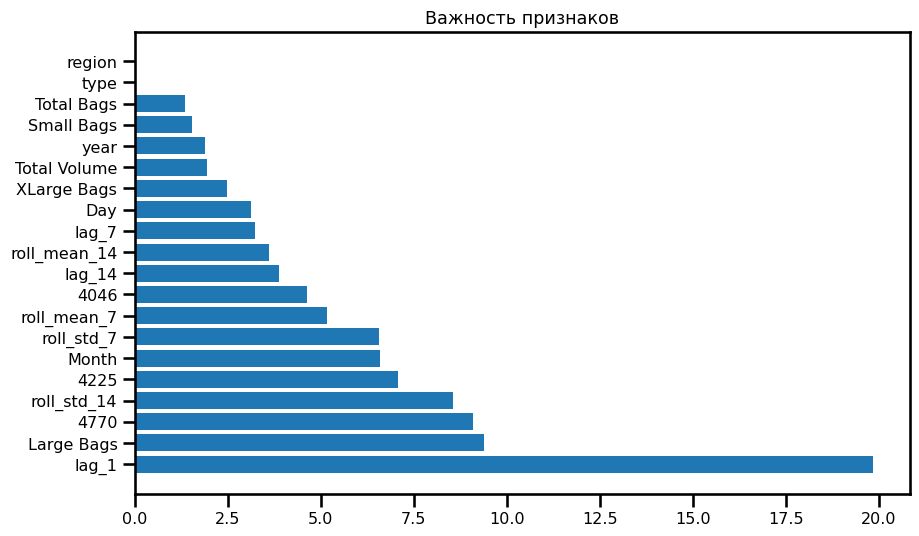

In [53]:
# --- –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ---
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.get_feature_importance()
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
import optuna

# --- –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å Optuna ---
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1500),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10),
        'verbose': False
    }
    
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print(f"–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {study.best_params}")
print(f"–õ—É—á—à–µ–µ RMSE: {study.best_value:.4f}")

d:\code\mlhw\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-22 08:09:16,743] A new study created in memory with name: no-name-18ef2ef6-7f2f-4b71-a9ad-f7a3b10f9b4c
[I 2025-05-22 08:09:17,208] Trial 0 finished with value: 14.889348702441026 and parameters: {'iterations': 1088, 'depth': 6, 'learning_rate': 0.08974083879233175, 'l2_leaf_reg': 0.20855996104923286, 'random_strength': 9.791971502231837}. Best is trial 0 with value: 14.889348702441026.
[I 2025-05-22 08:09:18,626] Trial 1 finished with value: 13.182300821139764 and parameters: {'iterations': 595, 'depth': 5, 'learning_rate': 0.04988197329124165, 'l2_leaf_reg': 0.9526493090715223, 'random_strength': 9.637094657128172}. Best is trial 1 with value: 13.182300821139764.
[I 2025-05-22 08:09:21,397] Trial 2 finished with value: 16.10128736347282

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'iterations': 1384, 'depth': 3, 'learning_rate': 0.02254510639784639, 'l2_leaf_reg': 9.726994125206593, 'random_strength': 3.260621003559439}
–õ—É—á—à–µ–µ RMSE: 10.5318


In [44]:
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=8)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

0:	learn: 11.8782975	total: 1.24ms	remaining: 1.72s
100:	learn: 5.8662797	total: 205ms	remaining: 2.6s
200:	learn: 3.9476431	total: 522ms	remaining: 3.07s
300:	learn: 3.2050427	total: 631ms	remaining: 2.27s
400:	learn: 2.5402880	total: 753ms	remaining: 1.84s
500:	learn: 2.1846468	total: 856ms	remaining: 1.51s
600:	learn: 1.8568732	total: 959ms	remaining: 1.25s
700:	learn: 1.6361136	total: 1.06s	remaining: 1.03s
800:	learn: 1.4254376	total: 1.17s	remaining: 850ms
900:	learn: 1.1944024	total: 1.27s	remaining: 681ms
1000:	learn: 1.0742545	total: 1.37s	remaining: 524ms
1100:	learn: 0.8852088	total: 1.47s	remaining: 379ms
1200:	learn: 0.7482196	total: 1.58s	remaining: 241ms
1300:	learn: 0.6467471	total: 1.68s	remaining: 107ms
1383:	learn: 0.5747591	total: 1.75s	remaining: 0us


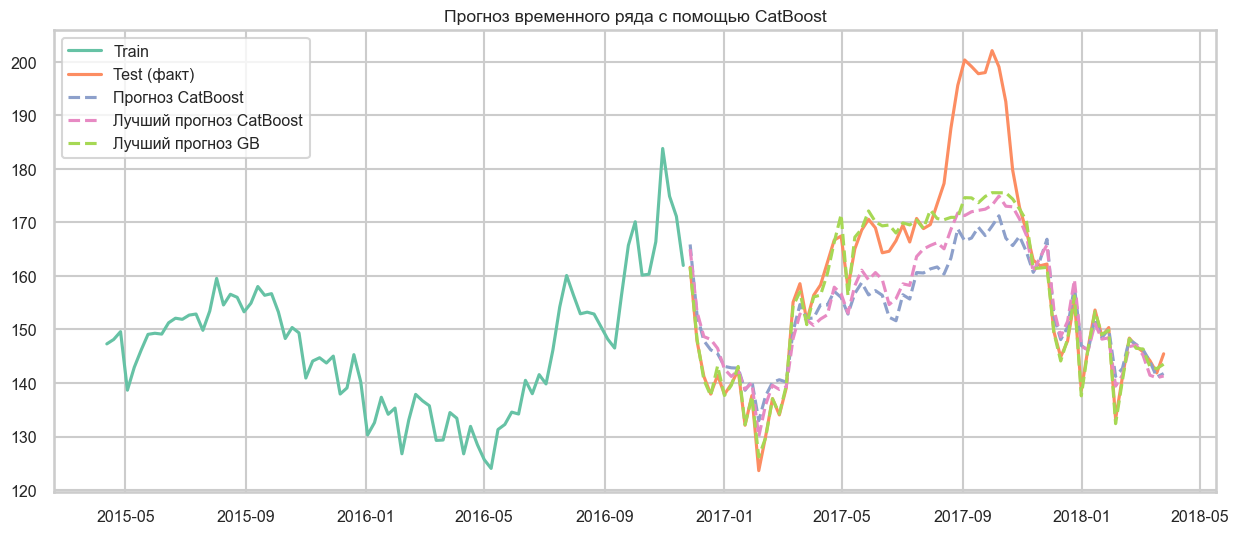

In [45]:
# --- –û–±—É—á–µ–Ω–∏–µ CatBoost ---
model = CatBoostRegressor(**study.best_params, verbose=100)
model.fit(X_train, y_train)

# --- –ü—Ä–æ–≥–Ω–æ–∑ ---
best_preds = model.predict(X_test)

# --- –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è ---
plt.figure(figsize=(15,6))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test (—Ñ–∞–∫—Ç)')
plt.plot(y_test.index, preds, label='–ü—Ä–æ–≥–Ω–æ–∑ CatBoost', linestyle='--')
plt.plot(y_test.index, best_preds, label='–õ—É—á—à–∏–π –ø—Ä–æ–≥–Ω–æ–∑ CatBoost', linestyle='--')
plt.plot(y_test.index, gb_preds, label='–õ—É—á—à–∏–π –ø—Ä–æ–≥–Ω–æ–∑ GB', linestyle='--')
plt.legend()
plt.title('–ü—Ä–æ–≥–Ω–æ–∑ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ —Å –ø–æ–º–æ—â—å—é CatBoost')
plt.show()